In [18]:
import os
import zipfile
from PIL import Image
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import gc

from zip_data_loader import load_images_as_list_of_dicts, test_format

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()

zip_images_list = load_images_as_list_of_dicts("pictures")

from transformers import pipeline
generator = pipeline("mask-generation", model="facebook/sam-vit-huge", device=0)

Device set to use cuda:0


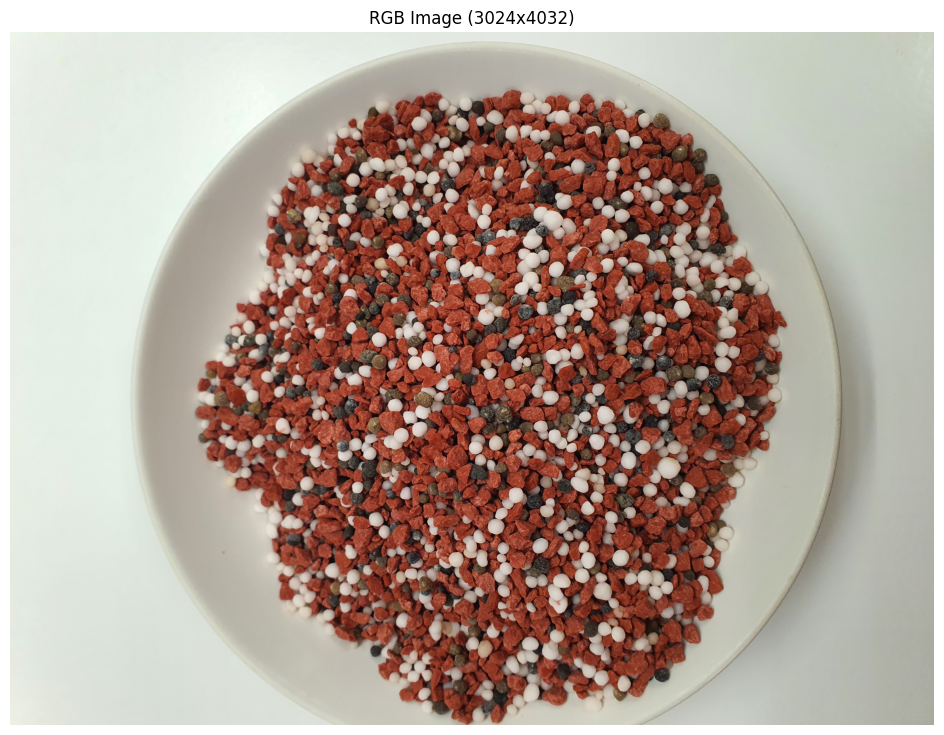

In [24]:
import matplotlib.pyplot as plt

# Your array shape: (3024, 4032, 3)
plt.figure(figsize=(12, 9))  # Adjust figure size for better viewing
plt.imshow(zip_images_list[0]['images'][0])
plt.axis('off')
plt.title('RGB Image (3024x4032)')
plt.show()